Kernel density estimation as well as PDF, EDF, and Quantile plot generation

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
virginica = [
    6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2,
    6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0,
    6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
    7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9,
    6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9
]

In [3]:
setosa = [
    5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9,
    5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1,
    5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7,
    4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1,
    5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0
]

In [4]:
dataVirginica = sorted(virginica)
dataSetosa = sorted(setosa)
n = len(dataVirginica) #datasets are same length

In [5]:
#Assume Gaussian Kernel, bandwidth(h) = 0.5
h = 0.5
normalizationFactor = 1 / (n*h*math.sqrt(2*math.pi))

In [6]:
def gaussianKDE(y, data):
    fy = sum(math.exp(-((y - yi)**2) / (2 * h**2)) for yi in data)
    return fy * normalizationFactor

In [7]:
print(gaussianKDE(5, dataVirginica))
print(gaussianKDE(7, dataVirginica))

0.06070405740564737
0.4006289662706869


In [8]:
#Estimating pdf using relative frequency histogram

In [9]:
def relFreqHist(y, binWidth):
    upper = y + (binWidth/2)
    lower = y - (binWidth/2)
    obvs = sum(lower <= yi <= upper for yi in dataVirginica)
    return obvs/(len(dataVirginica) * binWidth), obvs

In [10]:
print(relFreqHist(5, 0.48))
print(relFreqHist(7, 0.48))

(0.041666666666666664, 1)
(0.375, 9)


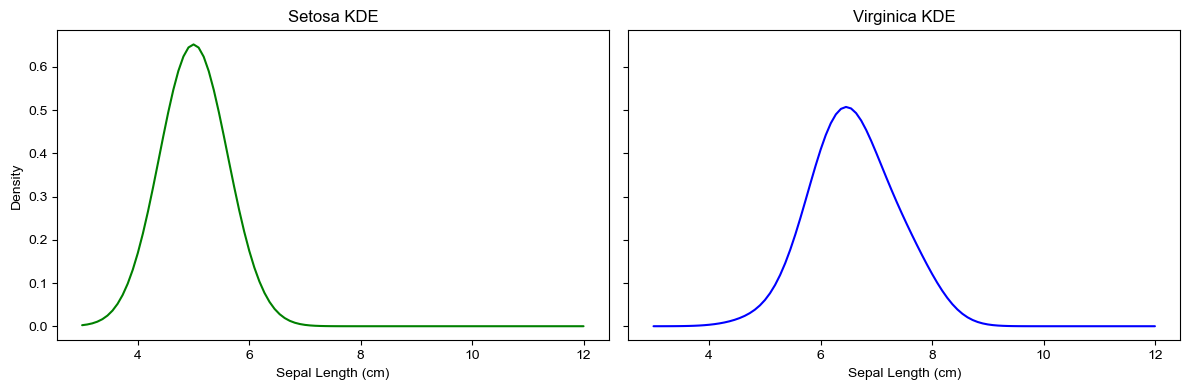

In [11]:
#pdf
potentialValues = np.linspace(3,12,100)
kdeSetosa = [gaussianKDE(y, dataSetosa) for y in potentialValues]
kdeVirginica = [gaussianKDE(y, dataVirginica) for y in potentialValues]

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.set_style("whitegrid")
axes[0].plot(potentialValues, kdeSetosa, color='green')
axes[0].set_title("Setosa KDE")
axes[0].set_xlabel("Sepal Length (cm)")
axes[0].set_ylabel("Density")
axes[1].plot(potentialValues, kdeVirginica, color='blue')
axes[1].set_title("Virginica KDE")
axes[1].set_xlabel("Sepal Length (cm)")
plt.tight_layout()
plt.show()

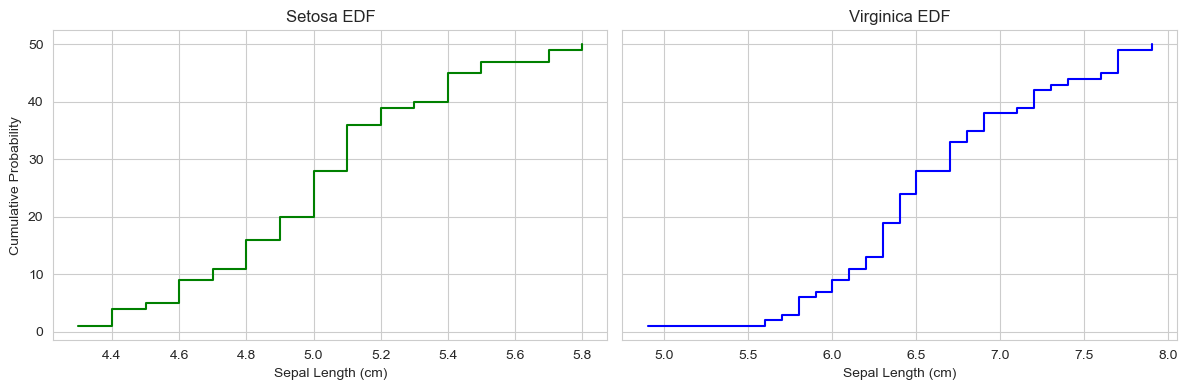

In [12]:
#EDF
arraySetosa = np.array(dataSetosa)
arrayVirginica = np.array(dataVirginica)

edfSetosa = np.arange(1, len(arraySetosa)+1 / len(arraySetosa))
edfVirginica = np.arange(1, len(arrayVirginica)+1 / len(arrayVirginica))

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.set_style("whitegrid")  
axes[0].step(arraySetosa, edfSetosa, where='post', color='green')
axes[0].set_title("Setosa EDF")
axes[0].set_xlabel("Sepal Length (cm)")
axes[0].set_ylabel("Cumulative Probability")
axes[1].step(arrayVirginica, edfVirginica, where='post', color='blue')
axes[1].set_title("Virginica EDF")
axes[1].set_xlabel("Sepal Length (cm)")
plt.tight_layout()
plt.show()

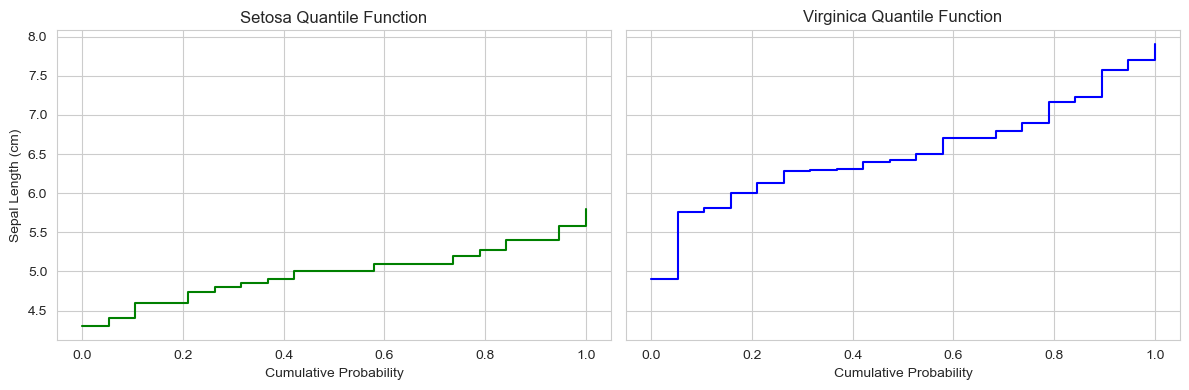

In [13]:
#quantile function

quantiles = np.linspace(0,1,20)
setosaQuantile = np.quantile(arraySetosa, quantiles)
virginicaQuantile = np.quantile(arrayVirginica, quantiles)

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.set_style("whitegrid")
axes[0].plot(quantiles, setosaQuantile, drawstyle='steps-post', color='green')
axes[0].set_title("Setosa Quantile Function")
axes[0].set_xlabel("Cumulative Probability")
axes[0].set_ylabel("Sepal Length (cm)")
axes[1].plot(quantiles, virginicaQuantile, drawstyle='steps-post', color='blue')
axes[1].set_title("Virginica Quantile Function")
axes[1].set_xlabel("Cumulative Probability")
plt.tight_layout()
plt.show()